# YouUniverse
_[Large-Scale Channel and Video Metadata from English-Speaking YouTube]_

- Data is made available through [Zenodo](https://doi.org/10.5281/zenodo.4650046).
- For context and an explanation of how data collection was done, see [the paper](https://arxiv.org/abs/2012.10378).
- Please cite this dataset if you use it:

~~~bibtex
@inproceedings{ribeiro2021youniverse,
      title={YouNiverse: Large-Scale Channel and Video Metadata from English-Speaking YouTube}, 
      author={Ribeiro, Manoel Horta and West Robert},
      year={2021},
      booktitle={{Proceedings of the 15th International AAAI Conference 
                  on Weblogs and Social Media (ICWSM'21)}}
}
~~~

## Channel Data

The file `df_channels_en.tsv.gz` contains data related to channels. 
It aggregates both basic stats from channels obtained from `channelcrawler.com`, 
as well as rankings obtained from `socialblade.com`.

- `category_cc`: category of the channel.
- `join_date`: join date of the channel.
- `channel`: channel id.
- `name_cc`: name of the channel.
- `subscribers_cc`: number of subscribers.
- `videos_cc`: number of videos.
- `subscriber_rank_sb`: rank in terms of number of subscribers.
- `weights`: weights cal

| category_cc | join_date  | channel                  | name_cc      | subscribers_cc | videos_cc | subscriber_rank_sb |  weights |
|:------------|:-----------|:-------------------------|:-------------|---------------:|----------:|-------------------:|---------:|
| Gaming      | 2015-08-26 | UCi_AR7WqvXa6LEnRn_7ES7A | Thunder Play |          11500 |       849 |             877395 |  11.175  |
| Sports      | 2016-02-04 | UCgVlxaBsBkmMh2SUgrzG1ZQ | Thunder Prod |          76000 |        61 |             198340 |  5.5295  |
| Music       | 2013-09-14 | UCNBYpqbD64tkuuFS-NNhkfQ | Thunder Rain |          33700 |        58 |             382980 |  6.5855  |


## Time Series Data

The file `df_timeseries_en.csv.gz` contains data related to time series. 
We have a data point for each channel and each week:

- `channel`: channel id.
- `category`: category of the channel as assigned by `socialblade.com` according to the last 10 videos at time of crawl.
- `datetime`: Week related to the data point.
- `views`: Total number of views the channel had this week.
- `delta_views`: Delta views obtained this week.
- `subs`: Total number of subscribers the channel had this week.
- `delta_subs`: Delta subscribers obtained this week.
- `videos`: Total number of videos the channel had this week.
- `delta_videos`: Delta videos obtained this week.
- `activity`: Number of videos published in the last 15 days.

| channel                  | category           | datetime   | views   | delta_views | subs | delta_subs | videos | delta_videos | activity |
|:-------------------------|:-------------------|:-----------|--------:|------------:|-----:|-----------:|-------:|-------------:|---------:|
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-03 | 202495  |           0 |  650 |   0        |      5 |            0 |        3 |
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-10 | 394086  |      191591 | 1046 | 396        |      6 |            1 |        1 |
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-17 | 835394  |      441308 | 1501 | 456        |      6 |            0 |        1 |
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-17 | 835394  |      441308 | 1501 | 456        |      6 |            0 |        1 |

Some facts about it:

- This file contains 18,872,499 data points belonging to 153,550 channels. 
- In average, it contains 2.8 years of data for each channel
- Data goes from early January 2015 to the end of September 2019. Not all channels have the complete time frame.
- Additionally we filtered all channels that were not in english given their video metadata (see `Raw Channels').

## Video Metadata

The file `yt_metadata_en.jsonl.gz` contains metadata data related to ~73M videos from ~137k channels.
Below we show the data recorded for each of the video

    {
        'categories': 'People & Blogs', 
        'channel_id': 'UCzzYnZ8GIzfB1Vr3hk2Nj9Q', 
        'crawl_date': '2019-11-02 09:01:05.328421', 
        'description': 'See more at http://www.standstrongcompany.com Fitness Keep it healthy at (...)', 
        'dislike_count': 8, 
        'display_id': 'x72dBgcVPFI', 
        'duration': 187, 
        'like_count': 91,
        'tags': 'Tiger Fitness,TigerFitness,fitness,workout,diet,health,pre workout,ab workout,(...)', 
        'title': 'Slingshot for Squats? | Tiger Fitness', 
        'upload_date': '2019-04-21 00:00:00', 
        'view_count': 2559
    }
    
Some facts about it:
- This data was crawled from YouTube between 2019-10-29 and 2019-11-23.
- It contains 72,924,794 videos created between 2005-05-24 to 2019-11-20.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
import seaborn as sns
import sys

In [3]:
NOTEBOOK_PATH = os.getcwd()
DIR_PATH = os.path.dirname(NOTEBOOK_PATH)
DATA_PATH = os.path.join(DIR_PATH, "data_youniverse")
UTILS_PATH = os.path.join(DIR_PATH, "utils")
# append utils path and import utils
sys.path.append(UTILS_PATH)
from ploting import *
from loading import *

In [4]:
df_channels_en = pd.read_csv(f"{DATA_PATH}/df_channels_en.tsv.gz", compression="infer", sep="\t") 

# print the top 10 channels with the most subscribers
display(df_channels_en.nlargest(n=10, columns = ['subscribers_cc']))

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
55,Music,2006-03-13,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,112139463,13839,102.0,2.087
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087
5,Entertainment,2007-01-15,UCIwFjwMjI0y7PDBVEO9-bkQ,Justin Bieber,46574085,134,12.0,2.087
7,Sports,2009-03-17,UCRijo3ddMTht_IHyNSNXpNQ,Dude Perfect,45800000,213,14.0,2.087
6,Music,2014-03-12,UCFFbwnve3yF62-tVXkTyHqg,Zee Music Company,43451109,4241,13.0,2.087
9,Music,2006-08-08,UC0C-w0YjGpqDXGB8IHb662A,Ed Sheeran,42000000,154,17.0,2.087


In [18]:
indices = np.where(df_channels_en['category_cc'].isnull())
df_channels_en.iloc[indices]



,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
6941,NaN,2009-05-12,UCa_4DcdTB9QfK0LY9-7qWuQ,AbbaVEVO,995000,36,17265.0,2.8200
8295,NaN,2012-12-23,UCVOftvvuyipcn7102TUFsSQ,Baka Oppai,760128,27,21172.0,2.9225
8885,NaN,2009-06-05,UCqH2YMSzMaGN92Vc3VkhWnQ,Sony Pictures Home E...,770000,6561,22799.0,2.9595
10449,NaN,2009-10-15,UCnzCV_PxVZ-hsOrTy2NGxJw,EuropeVEVO,654000,19,27450.0,2.9825
10736,NaN,2006-04-25,UCSydRCmlHx6na0zWscgAk9w,Warner Movies On Dem...,619000,582,28343.0,3.0095
...,...,...,...,...,...,...,...,...
135072,NaN,2012-02-04,UCfRjxraogo4vwPSajqZUnhg,Johnny Marsiglia & B...,10300,22,935163.0,24.2090
135287,NaN,2009-03-18,UCBkyyLkDRd_iql_OWY87BOA,SHARKSANDCREATURES,10500,139,937947.0,28.1220
135326,NaN,2016-07-24,UCfL3FVHRncVVoBnVI_EI8vw,spoiled milk,10600,33,938514.0,28.9550
136264,NaN,2013-01-28,UC1uzi-DavAwqFp4SWR3XKfA,THEKONDOR,10300,108,977157.0,53.1435


In [5]:
# available categories in the dataset
df_channels_en.category_cc.unique()

array(['Gaming', 'Education', 'Entertainment', 'Howto & Style', 'Sports',
       'Music', 'Film and Animation', 'Comedy', 'Nonprofits & Activism',
       'People & Blogs', 'News & Politics', 'Science & Technology',
       'Pets & Animals', 'Autos & Vehicles', 'Travel & Events', nan],
      dtype=object)

In [21]:
df_timeseries_en = pd.read_csv(f"{DATA_PATH}/df_timeseries_en.tsv.gz", compression="infer", sep="\t") # 41.5 seconds | category = Science & Technology

In [26]:
CATEGORY = "Gaming"


df_channels_filt = df_channels_en[df_channels_en['category_cc'] == CATEGORY]
df_timeseries_filt = df_timeseries_en[df_timeseries_en['category'] == CATEGORY]

df_channels_filt.nlargest(n=10, columns = ['subscribers_cc'])

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
10,Gaming,2015-04-06,UCEdvpU2pFRCVqU6yIPyTpMQ,Marshmello,39100000,366,18.0,2.087
42,Gaming,2011-09-15,UCKqH_9mk1waLgBiL2vT5b9g,VanossGaming,24800000,1079,87.0,2.087
41,Gaming,2012-05-26,UC7_YxT-KID8kRbqZo7MyscQ,Markiplier,24400000,4484,86.0,2.087
52,Gaming,2007-02-24,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,22833014,4255,99.0,2.087
56,Gaming,2011-11-11,UCAW-NpUFkMyCNrvRSSGIvDQ,Ninja,22400000,929,104.0,2.087
61,Gaming,2012-07-14,UCS5Oz6CHmeoF7vSad0qqXfw,DanTDM,22100000,3211,109.0,2.087
122,Gaming,2012-04-17,UCpGdL9Sn3Q5YWUH2DVUW1Ug,PopularMMOs,16900000,4521,187.0,2.087
128,Gaming,2006-09-13,UCYVinkwSX7szARULgYpvhLw,Ali-A,16500000,3263,196.0,2.087
152,Gaming,2013-01-31,UCD1Em4q90ZUK2R5HKesszJg,Clash of Clans,14600000,343,234.0,2.087


In [27]:
# merge channel and time series on channel id
df_channel_timeseries_filt = pd.merge(df_channels_filt, df_timeseries_filt, on='channel')


In [37]:
CHANNEL_ID = df_channel_timeseries_filt['channel'].unique()

In [38]:
# checking for vsauce
vsauce_metadata = df_channel_timeseries_filt[df_channel_timeseries_filt['channel'] == CHANNEL_ID[0]]
vsauce_metadata.head(10)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087,Gaming,2016-10-17 00:00:00,1.357761e+10,3.950802e+07,4.861796e+07,0.000000,2906,0,14
1,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087,Gaming,2016-10-24 00:00:00,1.363385e+10,5.624403e+07,4.880930e+07,191335.375000,2913,7,14
2,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087,Gaming,2016-10-30 23:00:00,1.368959e+10,5.573959e+07,4.897182e+07,162521.305699,2919,6,15
3,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087,Gaming,2016-11-06 23:00:00,1.373594e+10,4.635159e+07,4.909397e+07,122152.626592,2926,7,15
4,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087,Gaming,2016-11-13 23:00:00,1.376195e+10,2.600902e+07,4.917638e+07,82404.010417,2932,6,14
5,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087,Gaming,2016-11-20 23:00:00,1.378603e+10,2.407718e+07,4.925474e+07,78360.625000,2934,2,9
6,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087,Gaming,2016-11-27 23:00:00,1.381969e+10,3.365804e+07,4.934192e+07,87182.052083,2939,5,7
7,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087,Gaming,2016-12-04 23:00:00,1.384504e+10,2.535252e+07,4.974494e+07,403019.093750,2946,7,12
8,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087,Gaming,2016-12-11 23:00:00,1.392798e+10,8.294041e+07,5.037778e+07,632843.750000,2958,12,20
9,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087,Gaming,2016-12-18 23:00:00,1.403125e+10,1.032675e+08,5.102634e+07,648557.078125,2970,12,25


In [33]:
# number of missing videos
pct = (len(vsauce_metadata)/vsauce_metadata['videos_cc'].max())*100
print(f"vsauce has {pct:.2f}% missing videos in the dataset 'df_channel_timeseries_filt'")

vsauce has 42.16% missing videos in the dataset 'df_channel_timeseries_filt'


In [39]:
helper_filt = read_and_filter_feather(f"{DATA_PATH}/yt_metadata_helper.feather", CATEGORY)
helper_filt.head()

,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count
0,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,503.0,XPSYzLZ7xKU,200,15328.0,2019-10-03,357909.0
1,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,84.0,WWD_1Nq6iwQ,308,6498.0,2019-10-02,151492.0
2,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,36.0,0U1rkFraBQo,399,2723.0,2019-10-01,63057.0
3,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,111.0,NMknT8vKOL8,292,5274.0,2019-09-30,229530.0
4,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,156.0,s0P9hj1R_Zw,486,10025.0,2019-09-29,322653.0


In [39]:
yt_metadata_filtered = load_and_filter_jsonl_gz_file_by_chunks(f"{DATA_PATH}/yt_metadata_en.jsonl.gz", CATEGORY)
yt_metadata_filtered.to_csv(f"{DATA_PATH}/yt_gaming.csv.gz", index=False, compression="gzip") # 15m 40s | category = Film & Animation
yt_metadata_filtered.head()

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,upload_date,view_count
0,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:25.790269,0.0,y5IvyZlzELs,3442,9.0,"lego city,lego police,lego city police,lego fi...",2016-09-26 00:00:00,1253.0
1,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:28.334071,0.0,m1agc0qT0BY,2407,8.0,"lego city,lego police,lego city police,lego fi...",2016-09-25 00:00:00,2311.0
2,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:32.174979,1.0,rr6tfbBA9iY,1820,11.0,"lego city,lego dimensions,lego batman,lego dim...",2016-09-24 00:00:00,5596.0
3,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:25.379061,0.0,ZGll5_wD9Ys,1209,8.0,"lego city,lego city police,lego fire truck,leg...",2016-09-21 00:00:00,792.0
4,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:26.020550,426.0,kYkokQgnu20,2053,2076.0,"lego jurassic world,lego city,lego city for ki...",2016-09-21 00:00:00,1141393.0


# Science and Technology

In [41]:
yt_metadata_filt = pd.read_csv(os.path.join(DATA_PATH, 'yt_film&animation.csv.gz'), compression="infer")
yt_metadata_filt['upload_date'] = yt_metadata_filt['upload_date'].astype('datetime64[ns]')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/martinnguyen/Desktop/EPFL/9. semester/Applied Data Analysis/ada-2023-project-kadabros/data_youniverse/yt_film&animation.csv.gz'

In [50]:
video_count = yt_metadata_filt.groupby(pd.Grouper(key="upload_date", freq="W")).count().channel_id
for year in range(2005, 2020):
    total_videos_year = video_count[video_count.index.year.isin([year])].sum()
    print("We have {:,} video in {}".format(total_videos_year, year))

We have 3 video in 2005
We have 90 video in 2006
We have 3,065 video in 2007
We have 17,057 video in 2008
We have 32,508 video in 2009
We have 52,058 video in 2010
We have 82,849 video in 2011
We have 126,703 video in 2012
We have 168,318 video in 2013
We have 185,879 video in 2014
We have 220,075 video in 2015
We have 279,209 video in 2016
We have 394,585 video in 2017
We have 475,465 video in 2018
We have 365,140 video in 2019


Text(0.5, 1.0, 'Number of videos uploaded each week')

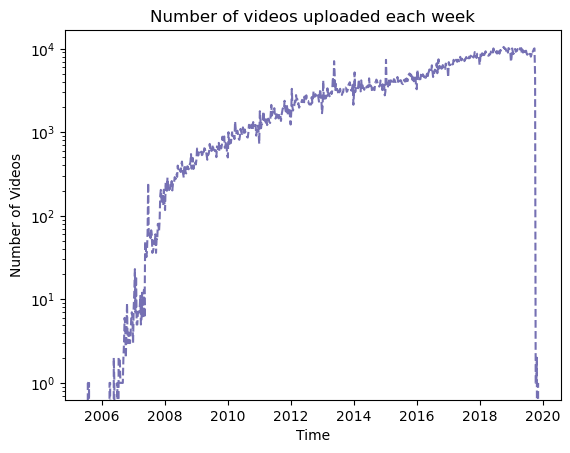

In [51]:
plt.plot(video_count, color="#7570b3", ls="--", label="\% videos uploaded")
plt.yscale("log")
plt.ylabel("Number of Videos")
plt.xlabel("Time")
plt.title("Number of videos uploaded each week")

In [52]:
# The following graph shows how many videos each channel uploads to YouTube per year.
yt_metadata_filt["yearNumber"] = yt_metadata_filt["upload_date"].dt.year
vd_cnt_by_id_yr = (
    yt_metadata_filt.groupby(["channel_id", "yearNumber"])
    .count()
    .categories.unstack()
    .reset_index()
)
vd_cnt_by_id_yr.columns.name = None
vd_cnt_by_id_yr_summary = vd_cnt_by_id_yr.describe()

Text(0.5, 1.0, 'The 2nd and 3rd quartiles of yearly video upload frequency')

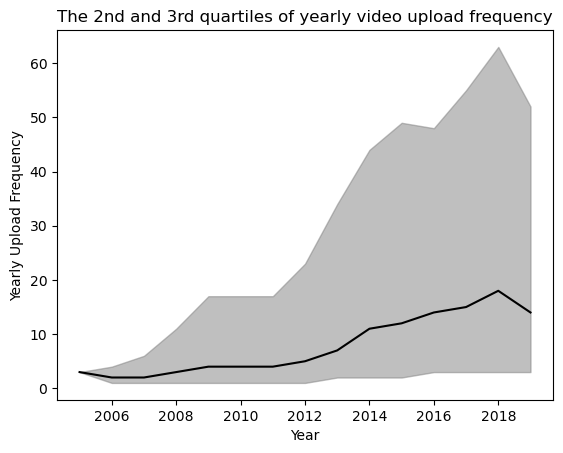

In [53]:

plt.fill_between(
    x=list(vd_cnt_by_id_yr_summary.columns.values),
    y1=list(vd_cnt_by_id_yr_summary.loc["25%", :]),
    y2=list(vd_cnt_by_id_yr_summary.loc["75%", :]),
    alpha=0.5,
    color="gray",
)
plt.plot(vd_cnt_by_id_yr_summary.loc["50%", :], color="black")
plt.xlabel("Year")
plt.ylabel("Yearly Upload Frequency")
plt.title("The 2nd and 3rd quartiles of yearly video upload frequency")
# here we choose quartiles, since the mean would be significantly affected by extremely high yearly upload rates

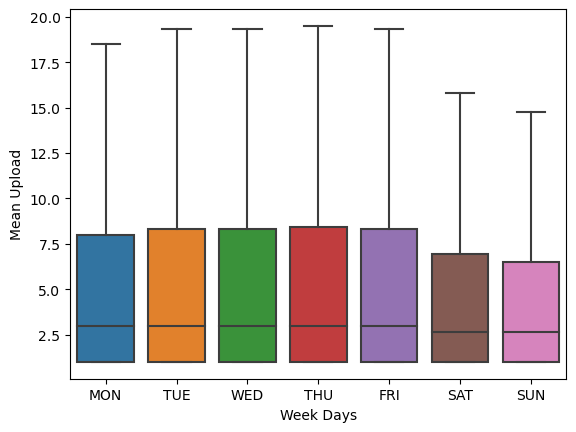

In [54]:
yt_metadata_filt["weekNumber"] = yt_metadata_filt["upload_date"].dt.weekday
vd_cnt_by_id_wk = (
    yt_metadata_filt.groupby(["channel_id", "weekNumber", "yearNumber"])
    .count()
    .categories.unstack()
    .reset_index()
)
vd_cnt_by_id_wk.columns.name = None
vd_cnt_by_id_wk["mean_upload"] = vd_cnt_by_id_wk.iloc[:, 2:].mean(axis=1, skipna=True)


labels = ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"]
ax = sns.boxplot(
    x="weekNumber", y="mean_upload", data=vd_cnt_by_id_wk, showfliers=False
).set(xlabel="Week Days", ylabel="Mean Upload", xticklabels=labels)

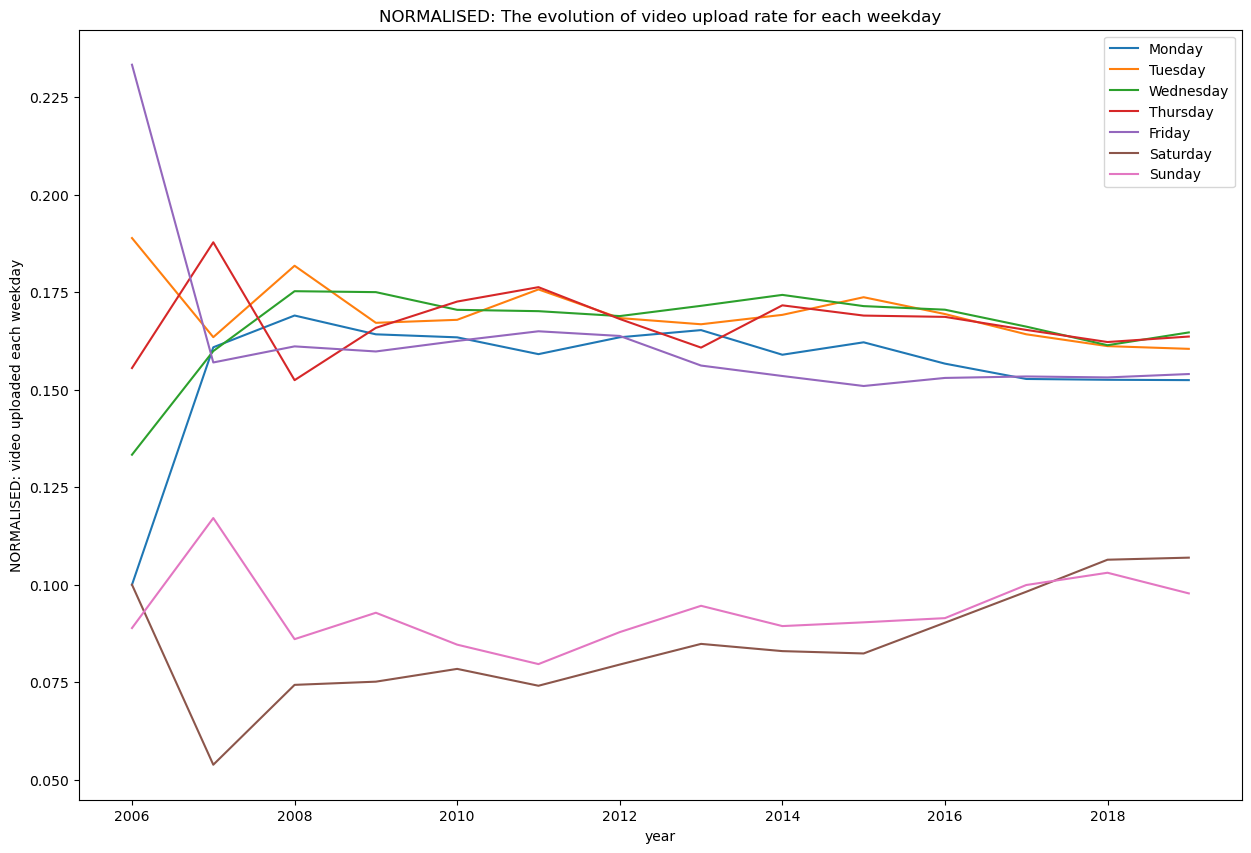

In [55]:
vd_cnt_by_wk = (
    yt_metadata_filt.groupby(["weekNumber", "yearNumber"])
    .count()
    .categories.unstack()
    .reset_index()
)
vd_cnt_by_wk.columns.name = None

vd_cnt_by_wk_norm = vd_cnt_by_wk.iloc[:, 2:] / vd_cnt_by_wk.iloc[:, 2:].sum(skipna=True)
plt.rcParams["figure.figsize"] = (15, 10)
plt.plot(vd_cnt_by_wk_norm.T)
plt.legend(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
plt.xlabel("year")
plt.ylabel("NORMALISED: video uploaded each weekday")
plt.title("NORMALISED: The evolution of video upload rate for each weekday")
plt.show()


In [40]:
tags_exploded = yt_metadata_filt['tags'].str.split(',').explode()
n_tags_exploded = tags_exploded.unique()
print(f"Number of unique tags: {len(n_tags_exploded)}")

NameError: name 'yt_metadata_filt' is not defined

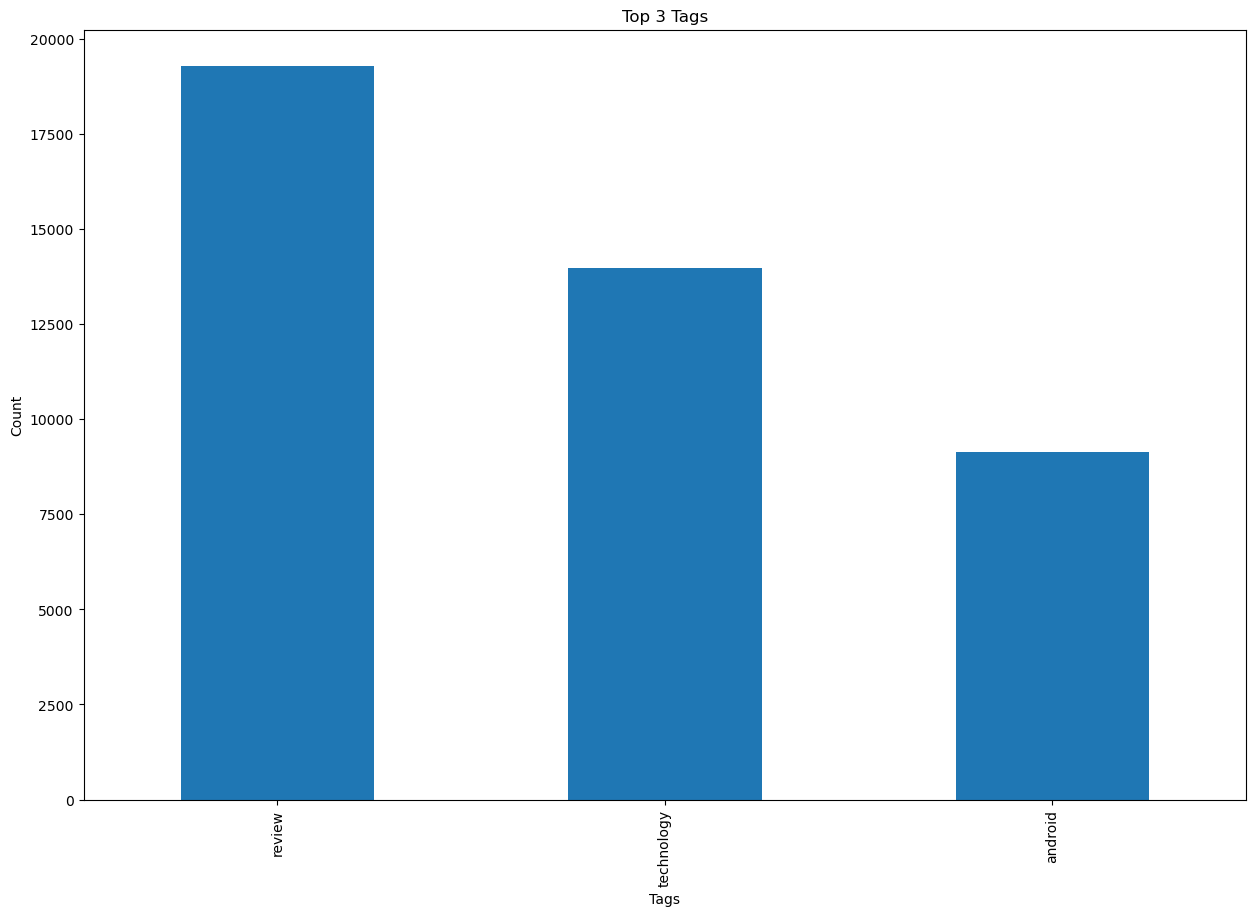

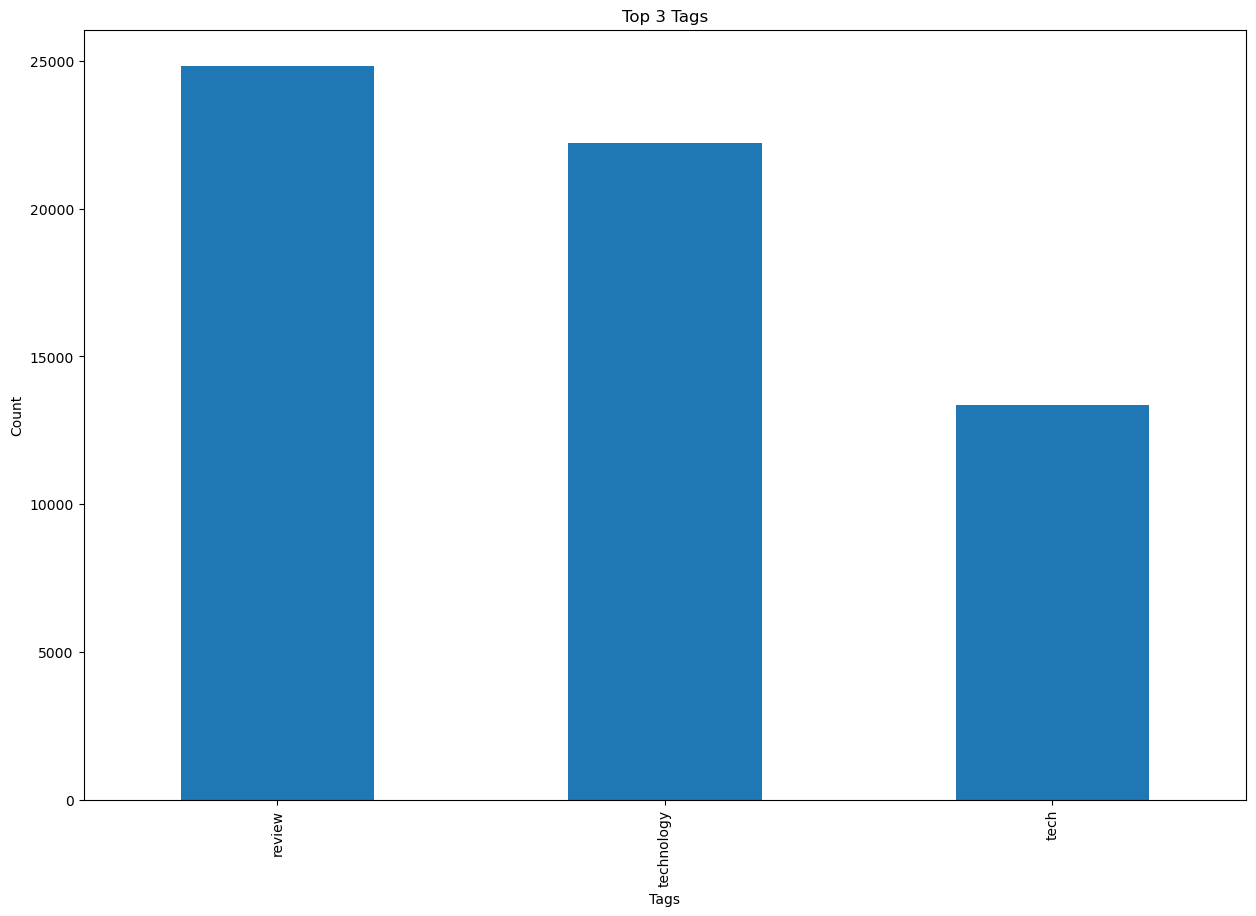

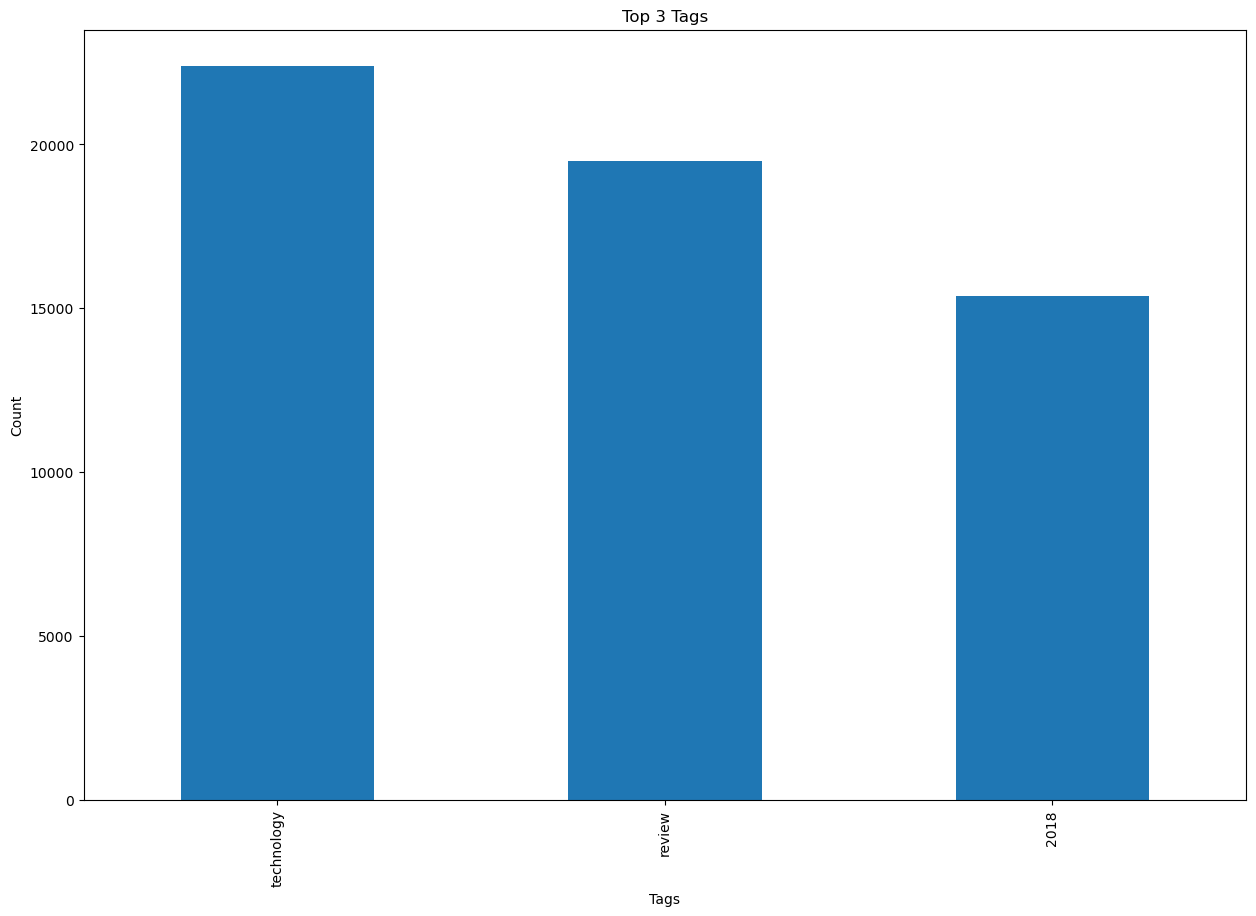

In [58]:
years = range(2016, 2019)  # or whatever years are applicable
for year in years:
    yt_metadata_filt_year = yt_metadata_filt[yt_metadata_filt['upload_date'].dt.year == year]
    if not yt_metadata_filt_year.empty:
        try:
            # Assuming the function plot_topN_tag is correctly defined and can handle cases with less than N tags
            plot_topN_tag(yt_metadata_filt_year['tags'], 3)
        except Exception as e:
            print(f"An error occurred for year {year}: {e}")
    else:
        print(f"No data available for year {year}")